In [ ]:
# import necessary libraries..
import numpy as snp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the dataset..
df=pd.read_csv("/content/telecom__data.csv")

In [ ]:
#snapshot of the dataset..
df.head(10)

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
1,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
3,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
4,Travelling,VI,4G,4,Satisfactory,21.123036,79.067904,Maharashtra,7,2022
5,Outdoor,Airtel,4G,5,Satisfactory,-1.000000,-1.000000,NaN,7,2022
6,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
7,Indoor,VI,3G,4,Satisfactory,-1.000000,-1.000000,NaN,7,2022
8,Indoor,RJio,4G,3,Satisfactory,19.225397,72.859307,Maharashtra,7,2022
9,Indoor,RJio,4G,1,Call Dropped,-1.000000,-1.000000,NaN,7,2022


In [ ]:
# columns of the datset..
df.columns

Index(['inout_travelling', 'operator', 'network_type', 'rating',
       'calldrop_category', 'latitude', 'longitude', 'state_name', 'month',
       'year'],
      dtype='object')

In [ ]:
# getting some more information about the dataset like data-types,memory usage etc..
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104334 entries, 0 to 104333
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   inout_travelling   104334 non-null  object 
 1   operator           104334 non-null  object 
 2   network_type       104316 non-null  object 
 3   rating             104334 non-null  int64  
 4   calldrop_category  104334 non-null  object 
 5   latitude           104334 non-null  float64
 6   longitude          104334 non-null  float64
 7   state_name         58609 non-null   object 
 8   month              104334 non-null  int64  
 9   year               104334 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 8.0+ MB


In [ ]:
# checking if duplicate values exists or not..
(df.duplicated().sum()/len(df))*100

60.58044357544041

In [ ]:
# dropping the duplicate values from the dataset..
data=df.drop_duplicates()

In [ ]:
data

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Indoor,VI,4G,1,Poor Voice Quality,-1.000000,-1.000000,NaN,7,2022
4,Travelling,VI,4G,4,Satisfactory,21.123036,79.067904,Maharashtra,7,2022
5,Outdoor,Airtel,4G,5,Satisfactory,-1.000000,-1.000000,NaN,7,2022
7,Indoor,VI,3G,4,Satisfactory,-1.000000,-1.000000,NaN,7,2022
...,...,...,...,...,...,...,...,...,...,...
104323,Indoor,Airtel,4G,3,Satisfactory,30.104297,78.289052,Uttarakhand,11,2023
104324,Outdoor,RJio,4G,4,Satisfactory,26.601906,74.858498,Rajasthan,11,2023
104328,Outdoor,VI,4G,1,Poor Voice Quality,21.132335,79.068327,Maharashtra,11,2023
104329,Indoor,RJio,4G,5,Satisfactory,12.958151,77.484752,Karnataka,11,2023


In [ ]:
# checking if null values exists or not..
data.isnull().sum()

,0
inout_travelling,0
operator,0
network_type,4
rating,0
calldrop_category,0
latitude,0
longitude,0
state_name,3610
month,0
year,0


In [ ]:
# Filling the missing values in network type and state name columns with MODE as this is useful when the missing values are few
# and you want to use the most common values in the columns.
data['state_name']=data['state_name'].fillna(data['state_name'].mode()[0])
data['network_type']=data['network_type'].fillna(data['network_type'].mode()[0])

<ipython-input-12-087456a49b46>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['state_name']=data['state_name'].fillna(data['state_name'].mode()[0])
<ipython-input-12-087456a49b46>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['network_type']=data['network_type'].fillna(data['network_type'].mode()[0])


In [ ]:
#The presence of -1 values in latitude and longitude fields typically indicates missing or invalid data.
#Handling these values depends on the context and what you're trying to achieve with the data.
#we have filled the invalid values with mean values..
invalid_coords = (data['latitude'] == -1) | (data['longitude'] == -1)
mean_latitude = data[data['latitude'] != -1]['latitude'].mean()
mean_longitude = data[data['longitude'] != -1]['longitude'].mean()
data.loc[invalid_coords, 'latitude'] = mean_latitude
data.loc[invalid_coords, 'longitude'] = mean_longitude

In [ ]:
data['operator'].value_counts()


,count
operator,
RJio,13587
Airtel,11507
VI,8436
BSNL,2971
Idea,2203
Vodafone,2137
MTNL,285
﻿RJio,1
﻿Idea,1


In [ ]:
# Remove any non-standard characters or invisible characters
data['operator'] = data['operator'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii').strip())
# Recheck the value counts after cleaning


<ipython-input-15-8b374179835c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['operator'] = data['operator'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii').strip())


In [ ]:
data['operator'].value_counts()

,count
operator,
RJio,13588
Airtel,11507
VI,8436
BSNL,2971
Idea,2204
Vodafone,2137
MTNL,285


In [ ]:
#The presence of both "Vodafone,""Idea," and their combination "VI" indicates that the data might include entries
#from before and after the merger of Vodafone and Idea. so we decided to combine all under VI.
data['operator'] = data['operator'].replace({'Vodafone': 'VI', 'Idea': 'VI'})
data['operator'].value_counts()

<ipython-input-17-e19c4f7bc9a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['operator'] = data['operator'].replace({'Vodafone': 'VI', 'Idea': 'VI'})


,count
operator,
RJio,13588
VI,12777
Airtel,11507
BSNL,2971
MTNL,285


In [ ]:
#a glimpse of what the pre-processed dataset looks like..
data.head(10)

,inout_travelling,operator,network_type,rating,calldrop_category,latitude,longitude,state_name,month,year
0,Indoor,RJio,4G,1,Poor Voice Quality,26.687119,82.171533,Uttar Pradesh,7,2022
2,Indoor,VI,4G,1,Poor Voice Quality,20.867711,77.886102,Maharashtra,7,2022
4,Travelling,VI,4G,4,Satisfactory,21.123036,79.067904,Maharashtra,7,2022
5,Outdoor,Airtel,4G,5,Satisfactory,20.867711,77.886102,Maharashtra,7,2022
7,Indoor,VI,3G,4,Satisfactory,20.867711,77.886102,Maharashtra,7,2022
8,Indoor,RJio,4G,3,Satisfactory,19.225397,72.859307,Maharashtra,7,2022
9,Indoor,RJio,4G,1,Call Dropped,20.867711,77.886102,Maharashtra,7,2022
10,Outdoor,VI,4G,4,Satisfactory,25.525933,87.032880,Bihar,7,2022
11,Travelling,RJio,4G,3,Satisfactory,20.867711,77.886102,Maharashtra,7,2022
12,Outdoor,VI,Unknown,5,Satisfactory,25.510683,86.937457,Bihar,7,2022


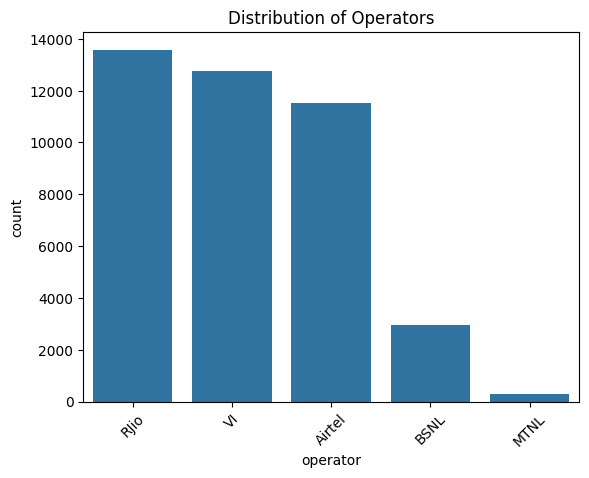

In [ ]:
#distribution of operators..
sns.countplot(x='operator', data=data)
plt.title('Distribution of Operators')
plt.xticks(rotation=45)
plt.show()

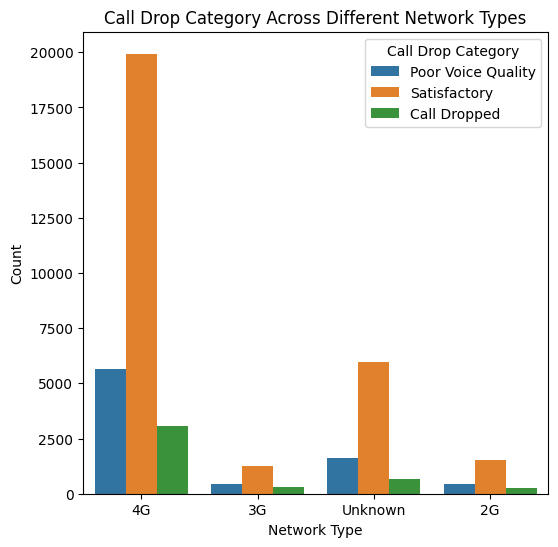

In [ ]:
# Plot the count of call drop categories across network types
plt.figure(figsize=(6,6))
sns.countplot(data=data,x='network_type', hue='calldrop_category')
plt.title('Call Drop Category Across Different Network Types')
plt.xlabel('Network Type')
plt.ylabel('Count')
plt.legend(title='Call Drop Category')
plt.show()

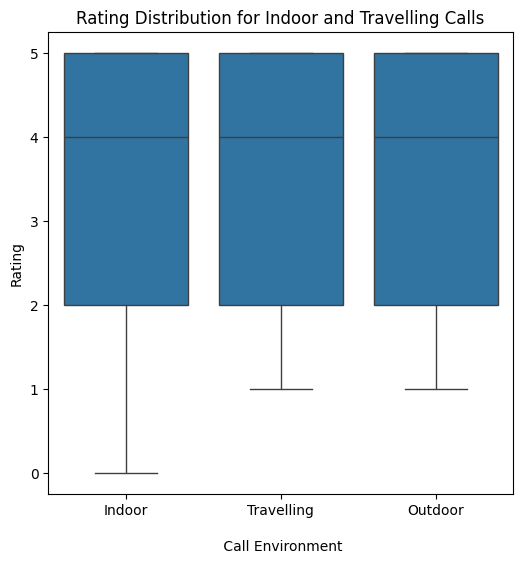

In [ ]:
# Plot the distribution of ratings between indoor,outdoor and travelling calls
plt.figure(figsize=(6,6))
sns.boxplot(data=data, x='inout_travelling', y='rating')
plt.title('Rating Distribution for Indoor and Travelling Calls')
plt.xlabel('\n Call Environment')
plt.ylabel('Rating')
plt.show()

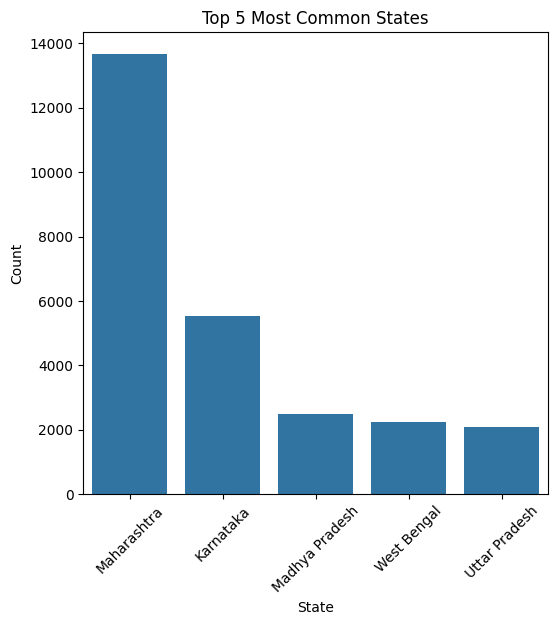

In [ ]:
# Plot the top 5 most common states
top_states = data['state_name'].value_counts().head(5)
plt.figure(figsize=(6,6))
sns.barplot(x=top_states.index, y=top_states.values)
plt.title('Top 5 Most Common States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

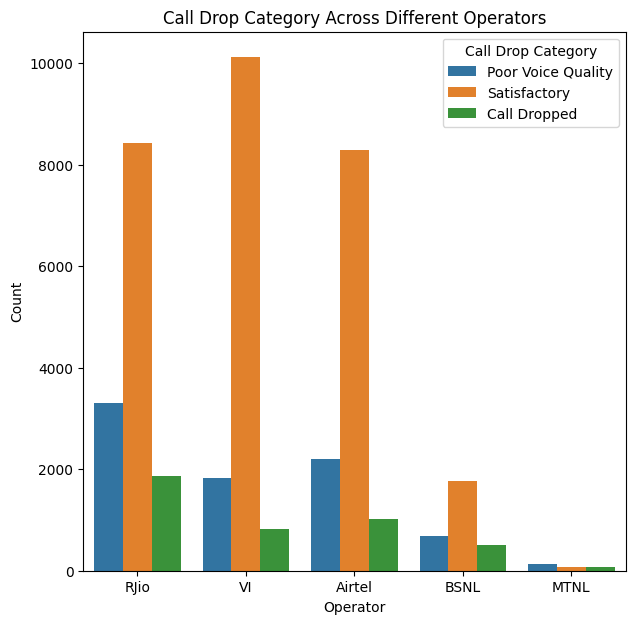

In [ ]:
# Plot the count of call drop categories across different operators
plt.figure(figsize=(7,7))
sns.countplot(data=data, x='operator', hue='calldrop_category')
plt.title('Call Drop Category Across Different Operators')
plt.xlabel('Operator')
plt.ylabel('Count')
plt.legend(title='Call Drop Category')
plt.show()

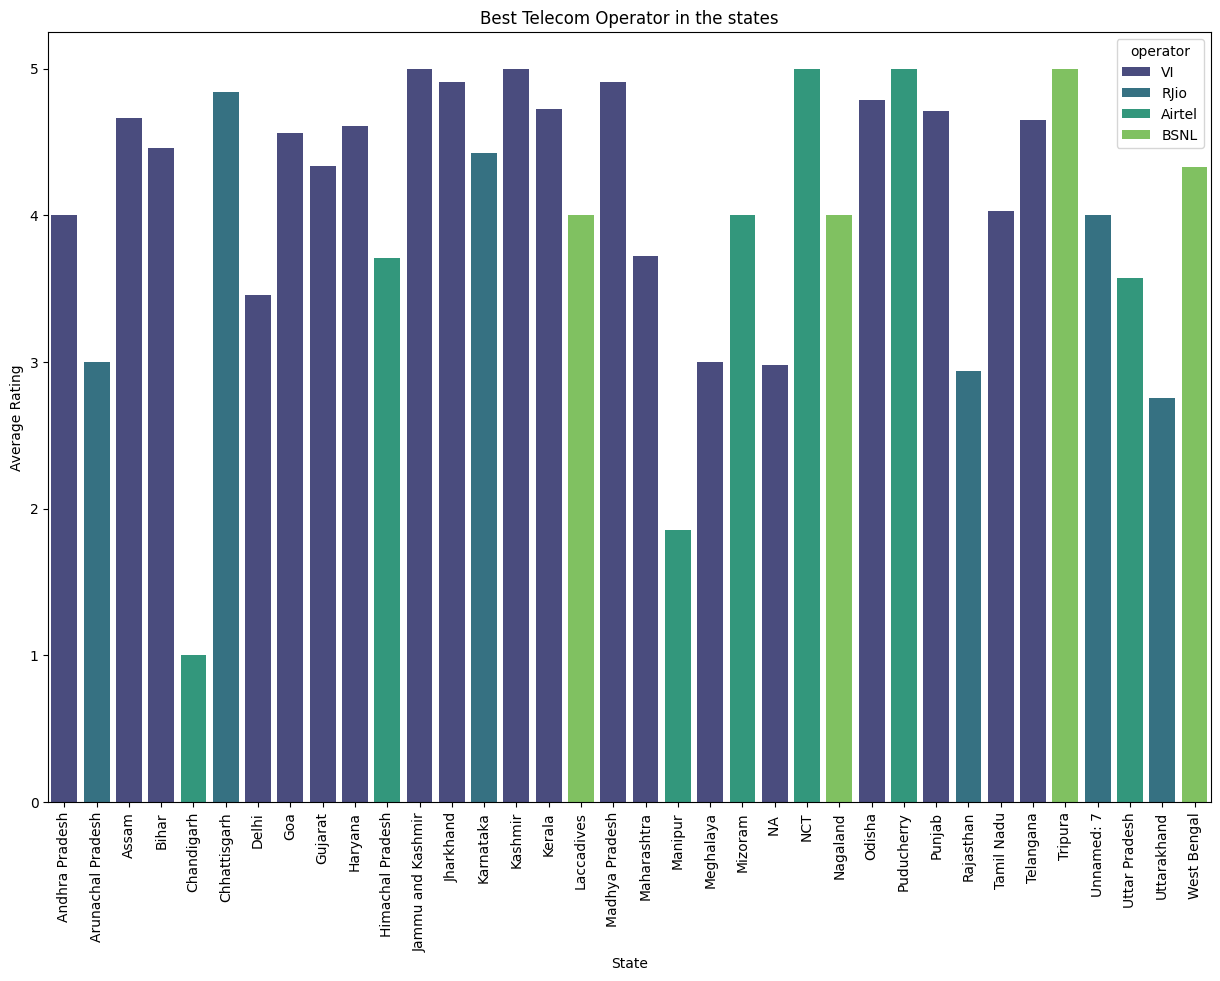

In [ ]:
state_operator_performance = data.groupby(['state_name','operator'])['rating'].mean().reset_index()
# Find the operator with the highest average rating in each state
best_operator_per_state = state_operator_performance.loc[state_operator_performance.groupby('state_name')['rating'].idxmax()]
# Find the top 5 states with the highest average ratings overall
top_5_states = best_operator_per_state.groupby('state_name')['rating'].mean().index
# Filter the best_operator_per_state DataFrame for only the top 5 states
top_5_best_operators = best_operator_per_state[best_operator_per_state['state_name'].isin(top_5_states)]
# Plotting
plt.figure(figsize=(15, 10))
sns.barplot(x='state_name', y='rating', hue='operator', data=top_5_best_operators, palette='viridis')
# Set the title and labels
plt.title('Best Telecom Operator in the states')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotate state names for better readability
# Show the plot
plt.show()

<ipython-input-25-61f883bee0df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = data['year'].astype(int)


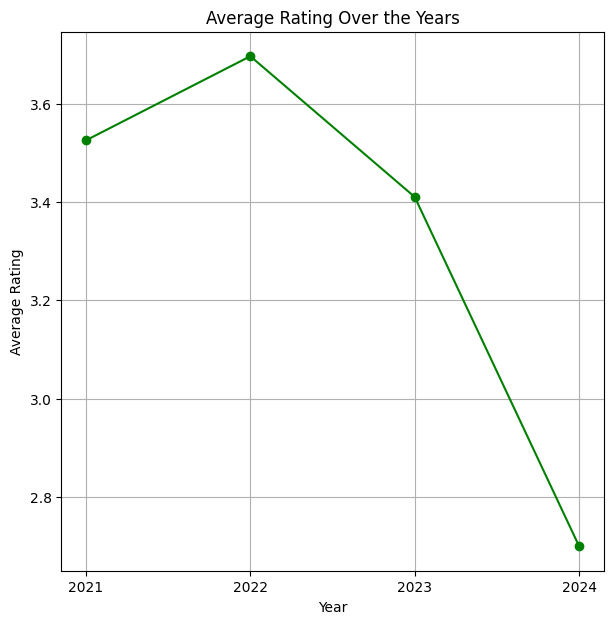

In [ ]:
#average rating over the years..
data['year'] = data['year'].astype(int)
# Group by Year and calculate the mean rating for each year
yearly_ratings = data.groupby('year')['rating'].mean().reset_index()
# Plotting
plt.figure(figsize=(7,7))
plt.plot(yearly_ratings['year'], yearly_ratings['rating'], marker='o', linestyle='-', color='g')
# Set the title and labels
plt.title('Average Rating Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Rating')
# Set x-ticks to be integer years only
plt.xticks(yearly_ratings['year'])
# Show the plot
plt.grid(True)
plt.show()

In [ ]:
#importing necessary machine learning libraries..
from sklearn.model_selection import train_test_split # for splitting the dataset into training and testing.
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier # for building models..
from sklearn.metrics import accuracy_score  #for measuring accuracy..
from sklearn.preprocessing import OneHotEncoder  #for encoding categorical variables such as in-out travelling.

In [ ]:
X = data.drop(columns=['calldrop_category'])  # Features
y = data['calldrop_category']  # Target

In [ ]:
X = pd.get_dummies(X)  #encoding the categorical variables..

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
#prediction.
y_pred = rf_model.predict(X_test)

In [ ]:
#accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [ ]:
#building the bagging model with the above random forest model as the base model..
bagging_model = BaggingClassifier(base_estimator=rf_model, n_estimators=100, random_state=42)
# Train the Bagging model
bagging_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [ ]:
# Evaluate the model
y_pred = bagging_model.predict(X_test)

In [ ]:
#accuracy of the bagging model..
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90
